In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import os

In [5]:
path = './Sales_Data'
files = [file for file in os.listdir(path) if not file.startswith('.')]
for file in files:
    print(files)
    break

['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


In [6]:
data = pd.DataFrame()
for file in files:
    current_data = pd.read_csv(path+'/'+file)
    data = pd.concat([data,current_data])

In [8]:
data.to_csv('sales.csv',index=False)

In [17]:
dataframe = pd.read_csv('sales.csv')
dataframe.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


##### Question:1 - What was the best month for sales? How much was earned that month?

In [18]:
#Now first we'll remove Nan from our dataset
dataframe.dropna(inplace=True)
dataframe.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [19]:
#Now we have to find out the month first for best selling months
#we'll target the order date column to get the month
dataframe['Month'] = dataframe['Order Date'].str[:2]
display(dataframe['Month'].dtype)
dataframe.head()

dtype('O')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


##### Task:1 ValueError: invalid literal for int() with base 10: 'Or' should be only numbers in Month column

In [22]:
#as we can see that the data type of th column is object we'll have to convert this into integer
dataframe  = dataframe[dataframe['Month'] != 'Or']
dataframe.head()
dataframe['Month'] = dataframe['Month'].astype('int32')#Now we can group easily make group of months and findout the ratio
dataframe.head()

c:\users\danyal\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


##### Task 2: TypeError: can't multiply sequence by non-int of type 'str' to convert into integer the columns for taking product

In [26]:
#We'll convert the columns into integer
dataframe['Quantity Ordered'] = pd.to_numeric(dataframe['Quantity Ordered'])
dataframe['Price Each'] = pd.to_numeric(dataframe['Price Each'])

In [28]:
#Now we'll have to check the sales by taking product of Quantity and Price Column
dataframe['Sales'] = dataframe['Quantity Ordered'] * dataframe['Price Each']
dataframe.head()#Now our dataset looks cool

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [29]:
dataframe.groupby('Month').sum()#as we can see the highest selling in the month of December

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


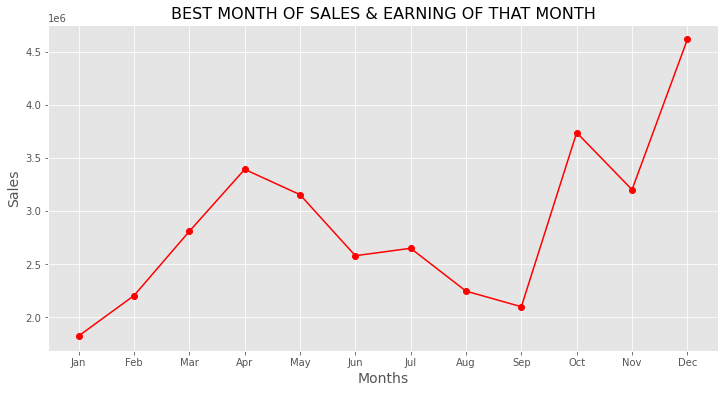

In [75]:
#we'll show in our plot so everyone can find out easily
result = dataframe.groupby('Month').sum()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
style.use('ggplot')
plt.figure(figsize=(12,6))
plt.plot(months,result['Sales'],color='r',marker='o')
plt.xlabel('Months',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.title('BEST MONTH OF SALES & EARNING OF THAT MONTH',fontsize=16)
#plt.grid(color='k', linestyle=':')
plt.show()
#We can say December will be best month of earning for this company, they needs to 

##### Question : 2 - Which city sold the most product?

In [92]:
# We need to group by city so we can find easily
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(', ')[2].split(' ')[0]

dataframe['City'] = dataframe['Purchase Address'].apply(lambda x: f' {get_city(x)} ({get_state(x)})')
dataframe.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [95]:
CityResult = dataframe.groupby('City').sum()
CityResult

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


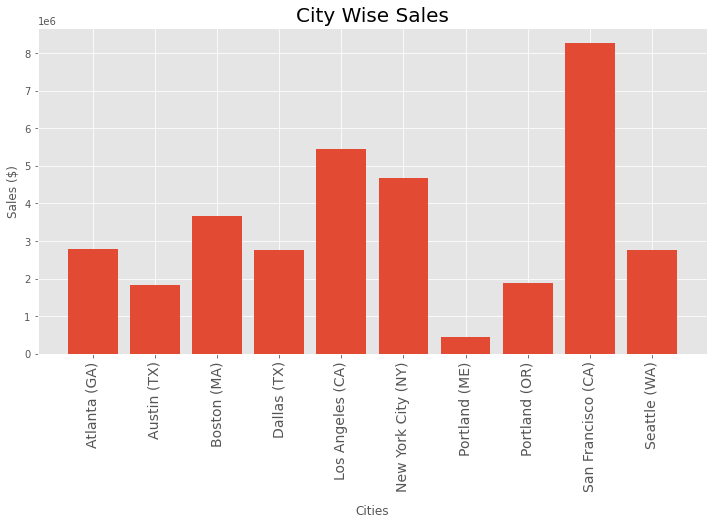

In [145]:
cities = [city for city,df in dataframe.groupby('City')]
plt.figure(figsize=(12,6))
plt.bar(cities , CityResult['Sales'])
plt.xticks(rotation='vertical',size=9,fontsize=14)
plt.xlabel('Cities')
plt.ylabel('Sales ($)')
plt.title('City Wise Sales',fontsize=20,)
plt.show()

###### Question 3: What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [124]:
#for this we'll target the column of order date
dataframe['Hour'] = pd.to_datetime(dataframe['Order Date']).dt.hour
dataframe['Minutes'] = pd.to_datetime(dataframe['Order Date']).dt.minute
dataframe.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [137]:
hour = dataframe.groupby('Hour').count()
hour

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minutes
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


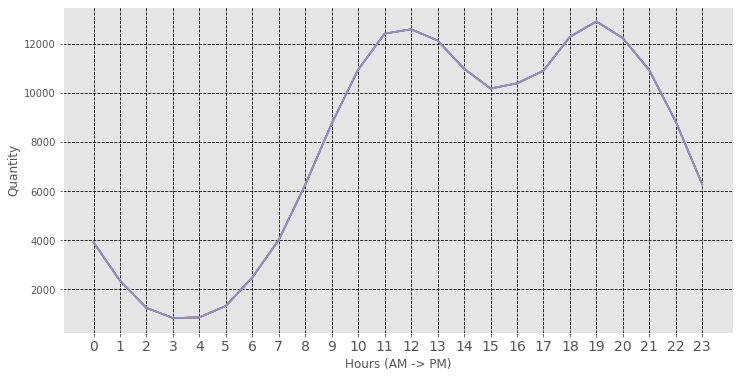

In [172]:
hours = [hour for hour,df in dataframe.groupby('Hour')]
plt.figure(figsize=(12,6))
plt.plot(hours , dataframe.groupby('Hour').count())
plt.xticks(hours,size=9,fontsize=14)
plt.xlabel('Hours (AM -> PM)')
plt.ylabel('Quantity')
plt.grid(c='k',linestyle='--')
plt.show()#My recommendation to increase their sale at 11 am -12 am and 6 pm to 7 pm

##### Question 3 - Which products are most often sold together?

In [163]:
#We'll take 2 products which sells most of the time together 
#at this time we'll need to target the column of Product

df = dataframe[dataframe['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ' ,'.join(x))
df.head()

c:\users\danyal\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone ,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone ,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone ,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone ,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones ,Bose SoundSport He..."


In [179]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row = row.split(',')
    count.update(Counter(combinations(row,2)))

print('-----------------The most top 10 Sold Products-----------------')    

for key,value in count.most_common(10): #we'll get the tope 10 most common group which sells most of the time 
    print(key)# These most top 10 sold products

-----------------The most top 10 Sold Products-----------------
('iPhone ', 'Lightning Charging Cable')
('Google Phone ', 'USB-C Charging Cable')
('iPhone ', 'Wired Headphones')
('Google Phone ', 'Wired Headphones')
('iPhone ', 'Apple Airpods Headphones')
('Vareebadd Phone ', 'USB-C Charging Cable')
('USB-C Charging Cable ', 'Wired Headphones')
('Google Phone ', 'Bose SoundSport Headphones')
('Google Phone ', 'USB-C Charging Cable ')
('iPhone ', 'Lightning Charging Cable ')


##### Question 5: Which product sold the most? Why do you think it sold the most?

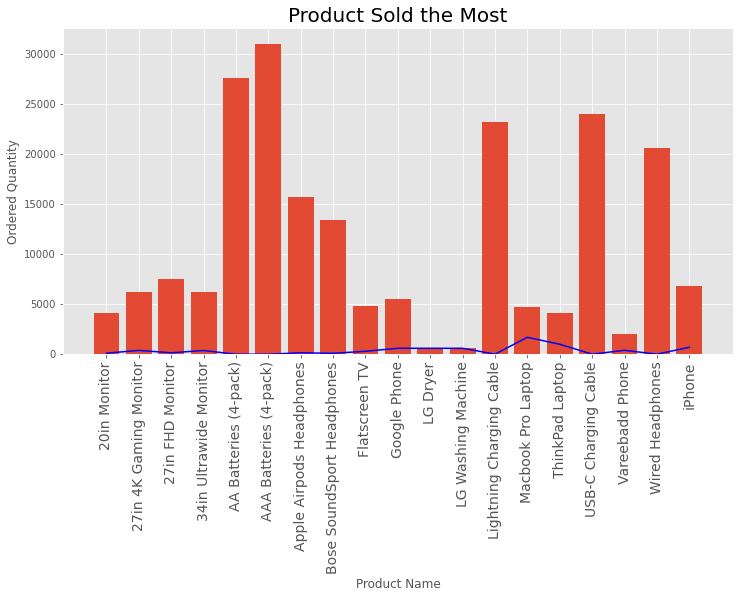

In [191]:
#for getting the most trending product, we'll have to group of that product
product_group = dataframe.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
prices = product_group.mean()['Price Each']
keys = [pair for pair,key in product_group]
plt.figure(figsize=(12,6))
plt.bar(keys , quantity_ordered)
plt.plot(keys,prices,'b' )
plt.xticks(rotation='vertical',size=9,fontsize=14)
plt.xlabel('Product Name')
plt.ylabel('Ordered Quantity')
plt.title('Product Sold the Most',fontsize=20,)
plt.show()

c:\users\danyal\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


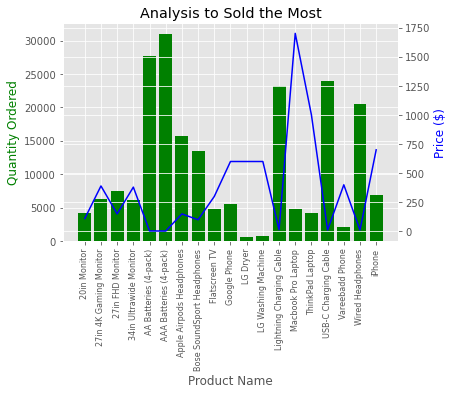

In [205]:

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)
plt.title('Analysis to Sold the Most')

fig.show()